# Balanceamento de dados

Trabalhando com dados para classificação podemos encontrar dados desbalanceados, como por exemplo em uma classificação binária 0 ou 1. Podemos ter 9.000 registros de 0 e 1000 registros de 1. Desta forma não fica bem distribuído para um modelo de machine learning aprender;

Quando precisamos aplicar um modelo de aprendizagem, este modelo pode não aprender o suficiente devido os dados estarem com poucos exemplos da classe 1, o modelo pode aprender de mais sobre a classe 0 e pouco da classe 1.

Vamos criar uma massa de dados como exemplo.

###  Gerando uma massa de dados

In [20]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from collections import Counter
from numpy import where

x, y = make_classification(
    n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.9], flip_y=0)

In [9]:
count_y = Counter(y)
print(count_y)

Counter({0: 9001, 1: 999})


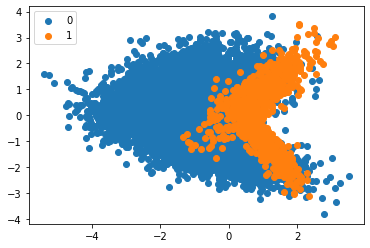

In [21]:
for l, _ in count_y.items():
    linha = where(y==l)[0]
    plt.scatter(x[linha, 0], x[linha, 1], label=str(l))
plt.legend()
plt.show()

Com a massa de dados criada, agora vamos aplicar a tecnica para balancear os dados.

### Balanceando os dados

In [25]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x, y = smt.fit_resample(x,y)

In [26]:
# Contagem dos dados
vl = Counter(y)
print(vl)

Counter({1: 9001, 0: 9001})


Após aplicar o SMOTE é possivel ver que os dados agora tem a mesma quantidade de amostra.

Uma dica que pode ser útil, quando for aplicar esta tecnica, aplicar após separar em dados de treino e teste, sendo assim o dados de teste permaneceram os originais.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Gerando uma nova massa de dados
x, y = make_classification(
    n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.9], flip_y=0)

# Dividindo em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=.2, stratify=y)
print('Antes do balanceamento:')
print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

# Balanceando os dados
smt = SMOTE()
x_treino, y_treino = smt.fit_resample(x_treino, y_treino)
print('\nDepois do balanceamento')
print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

Antes do balanceamento:
(8000, 2) (2000, 2)
(8000,) (2000,)

Depois do balanceamento
(14402, 2) (2000, 2)
(14402,) (2000,)


O objeto stratify = y dentro do train_test_split matem uma proporção para o treinamento dos dados. Por exemplo se a divisão for de 80% de valor 0 e e 20% de valor1, ela garantirá que a divisão tenha a measma proporção de 80/20.

**Fonte**: https://machinelearningmastery.com/